# Explanatory Data Analysis

In [2]:
# Standard imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Loading data sets for illustration 

### Real data: HMEQ data set
Please find a notebook with description of the data and EDA as well as data preparation demos [here](https://github.com/Humboldt-WI/bads/blob/master/demo_notebooks/4_nb_data_preparation.ipynb). For a demo of a fully-fledged ML workflow using this data set see [here](https://github.com/stefanlessmann/ESMT_IML/blob/main/notebooks/p0_demo_ml_pipeline.ipynb)

In [72]:
# HMEQ Data
url = 'https://raw.githubusercontent.com/Humboldt-WI/bads/master/data/hmeq.csv'

# We will use pandas read_csv method to read data right from the web
hmeq = pd.read_csv(url)
hmeq['BAD'] = hmeq['BAD'].astype('bool')
hmeq.head(4)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,True,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,True,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,True,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,True,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
hmeq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   bool   
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: bool(1), float64(9), int64(1), object(2)
memory usage: 564.7+ KB


## Common Summary Statistics and other EDA Tools

In [ ]:
#num_features = hmeq.select_dtypes(exclude=['bool', 'O']).columns

In [87]:
features = ["LOAN", "DEBTINC"]
print(hmeq.groupby("BAD")[features].mean())
print(hmeq.groupby("BAD")[features].median())
print(hmeq.groupby("BAD")[features].quantile(q=0.95))

               LOAN    DEBTINC
BAD                           
False  19028.107315  33.253129
True   16922.119428  39.387645
          LOAN    DEBTINC
BAD                      
False  16900.0  34.541671
True   14900.0  38.079762
          LOAN    DEBTINC
BAD                      
False  39550.0  42.135485
True   41080.0  62.777490


In [95]:
pd.crosstab(hmeq.BAD, hmeq.JOB, normalize=True)

JOB,Mgr,Office,Other,ProfExe,Sales,Self
BAD,,,,,,
False,0.103503,0.144869,0.322830,0.187291,0.012498,0.023763
True,0.031509,0.022003,0.097518,0.037317,0.006689,0.010209


In [96]:
hmeq.describe()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


### Computing quantiles, IQR, and outliers

In [ ]:
# Calculate IQR
X = hmeq['LOAN']  # select a feature
# Compute quantiles and IQR
q1 = X.quantile(0.25)
q3 = X.quantile(0.75)
iqr = q3 - q1
# Define upper/lower bound
upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr
# Find outliers
outliers = X[(X < lower) | (X > upper)]

In [ ]:
# Remove outliers
clean = hmeq['LOAN'].copy()
clean.drop(index=outliers.index, inplace=True)

#### Outlier visualization

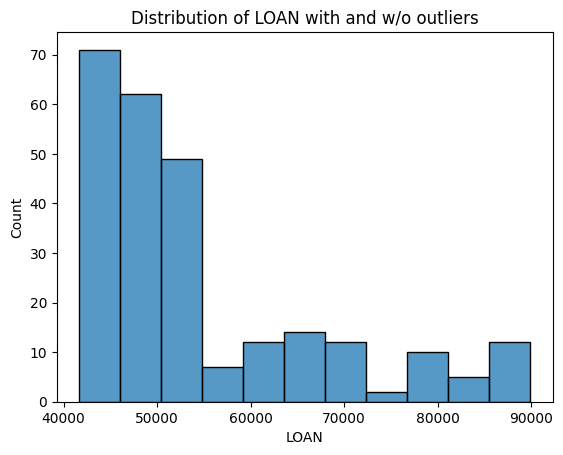

In [141]:
# Histogram of outliers
sns.histplot(data=outliers)
plt.title('Distribution of LOAN outliers')
plt.show()

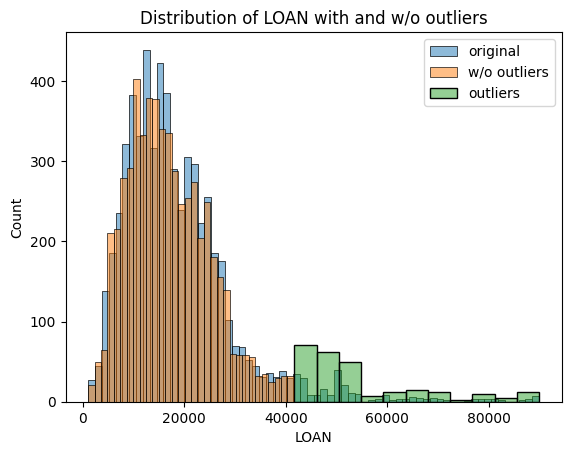

In [146]:
# Histogram of outliers
sns.histplot(data=hmeq['LOAN'], label='original', alpha=0.5)
sns.histplot(data=clean, label='w/o outliers', alpha=0.5)
sns.histplot(data=outliers, label='outliers', alpha=0.5)
plt.title('Distribution of LOAN with and w/o outliers')
plt.legend(loc='best')
plt.show()

In [ ]:
# Visualize using effect of removing outliers
tmp = {'original': hmeq['LOAN'].values, 
       'w/o outliers':clean.values}
sns.boxplot(data=tmp)
plt.title('Distribution of LOAN with and w/o outliers')
plt.show()

## Common EDA Visualizations

### Histograms and Count plots EDA plots

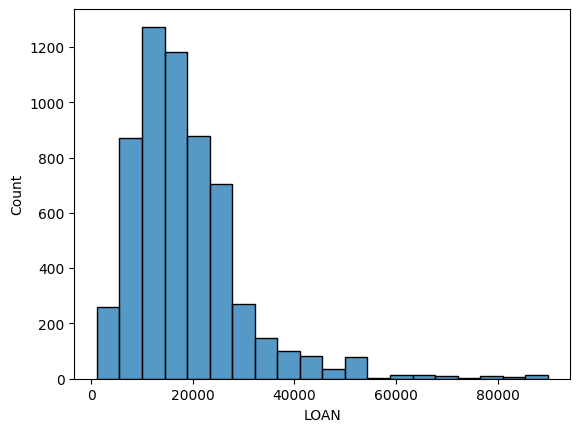

In [125]:
sns.histplot(hmeq.LOAN, bins=20)
plt.show()

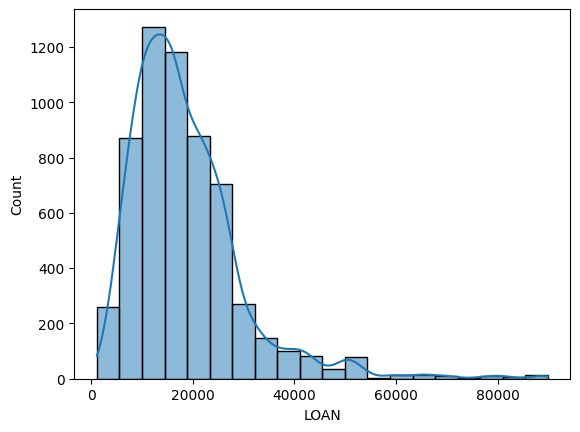

In [35]:
sns.histplot(hmeq.LOAN, bins=20, kde=True)
plt.show()

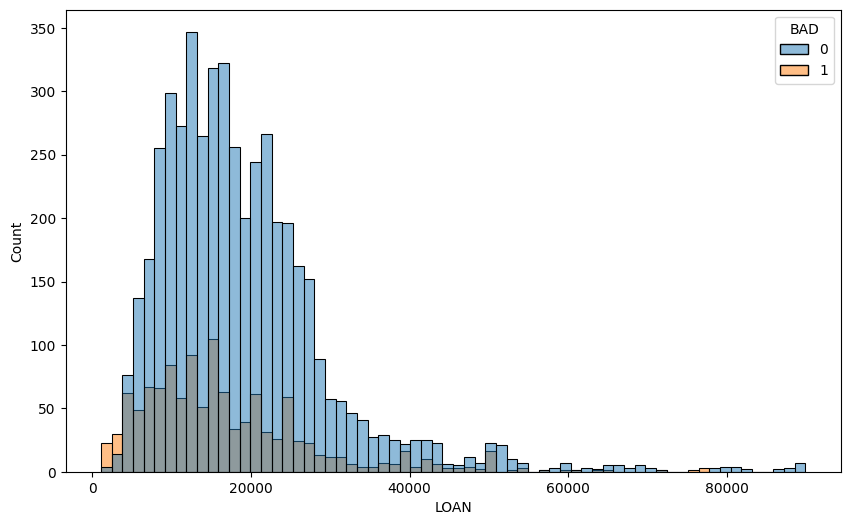

In [46]:
plt.figure(figsize=(10,6))
sns.histplot(data=hmeq, x='LOAN', hue='BAD')
plt.show()


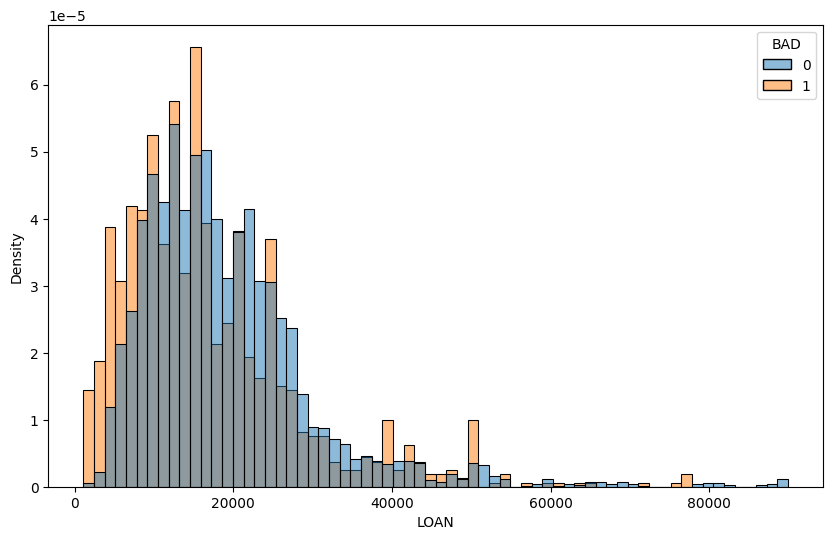

In [44]:
plt.figure(figsize=(10,6))
sns.histplot(data=hmeq, x='LOAN', hue='BAD', 
             stat='density', common_norm=False)
plt.show()


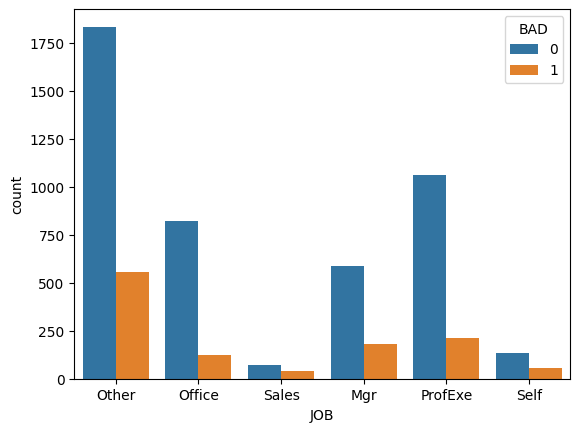

In [23]:
sns.countplot(data=hmeq, x='JOB', hue='BAD')
plt.show()

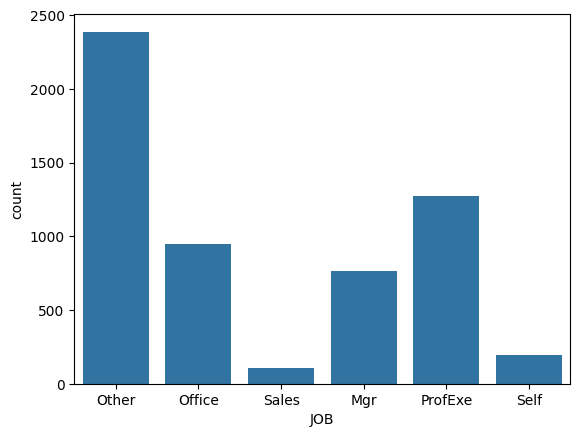

In [110]:
sns.countplot(x=hmeq.JOB)
plt.show()

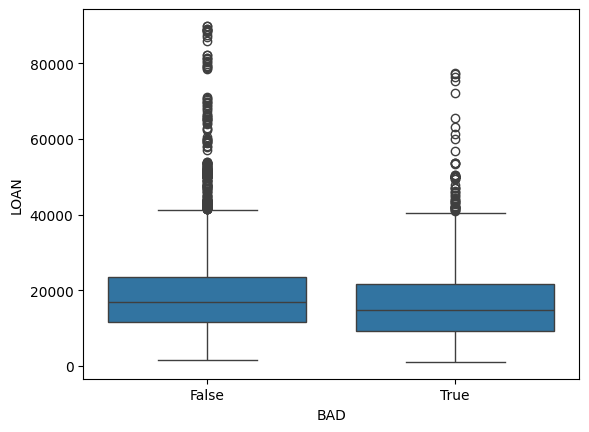

In [111]:
sns.boxplot(data=hmeq, y='LOAN', x='BAD')
plt.show()

### Violin Plot

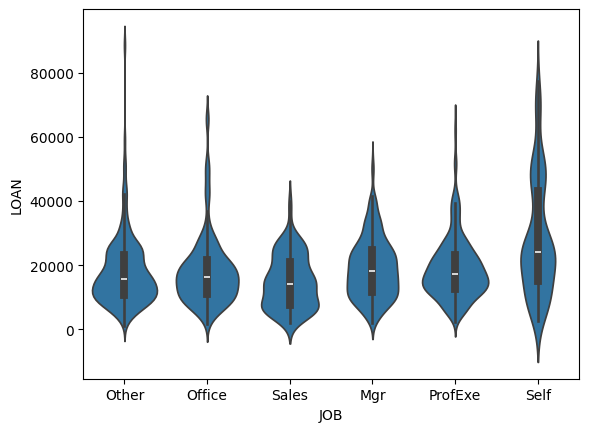

In [66]:
sns.violinplot(data=hmeq, x='JOB', y='LOAN')
plt.show()

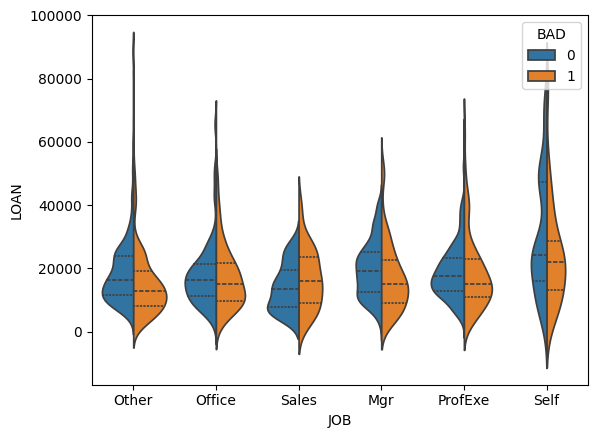

In [62]:
sns.violinplot(data=hmeq, x='JOB', y='LOAN', hue='BAD', split=True, inner='quart')
plt.show()

### Correlation Matrix

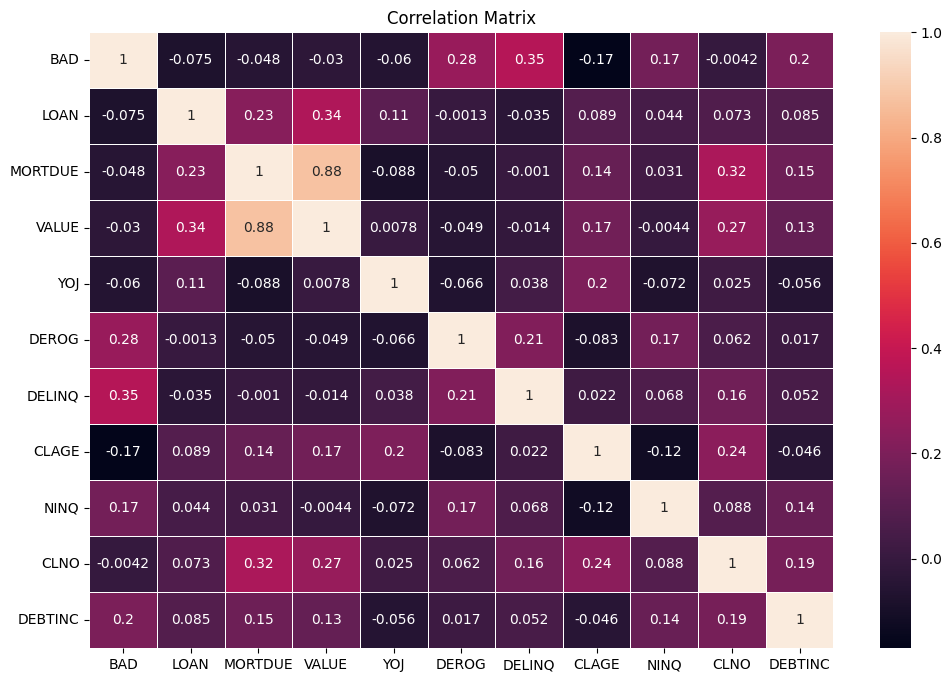

In [108]:
corr= hmeq.select_dtypes(exclude='O').corr()
f,ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corr, annot=True, linewidth=.5)
plt.title('Correlation Matrix')
plt.show()